In [3]:
import itertools
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg

column_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

iris = pd.read_csv('iris.data', names=column_names)
iris = iris[iris['Species'] == 'Iris-virginica']
print(iris.head())

column_names = column_names[:-1]

     SepalLength  SepalWidth  PetalLength  PetalWidth         Species
100          6.3         3.3          6.0         2.5  Iris-virginica
101          5.8         2.7          5.1         1.9  Iris-virginica
102          7.1         3.0          5.9         2.1  Iris-virginica
103          6.3         2.9          5.6         1.8  Iris-virginica
104          6.5         3.0          5.8         2.2  Iris-virginica


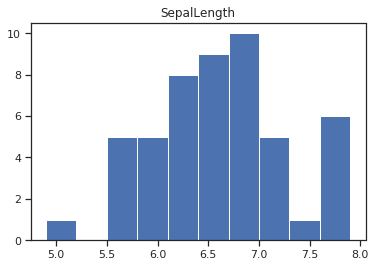

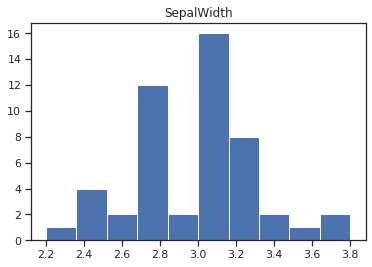

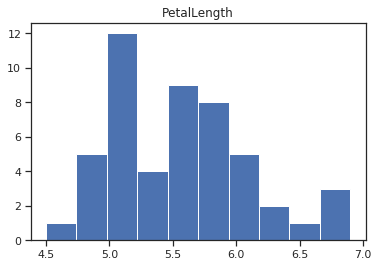

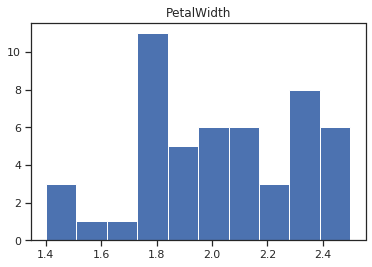

In [4]:
for name in column_names:
    plt.hist(iris[name])
    plt.title(name)
    plt.show()

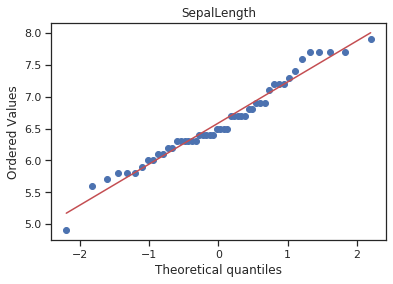

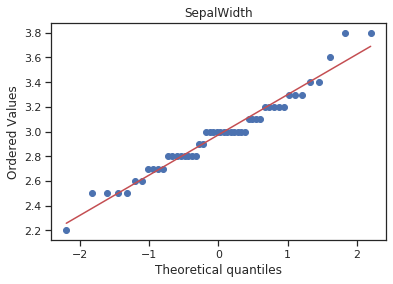

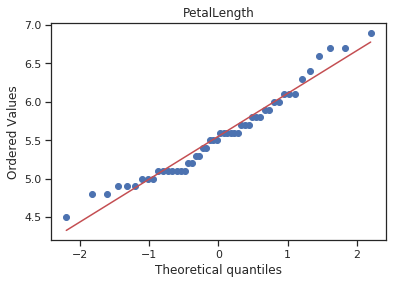

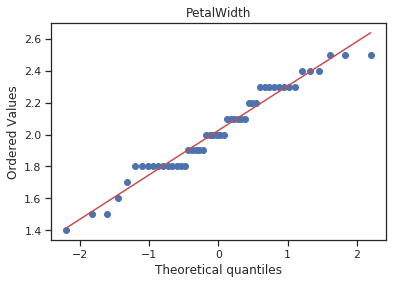

In [5]:
for name in column_names:
    stats.probplot(iris[name], plot=plt)
    plt.title(name)
    plt.show()

In [6]:
names_normal = []
for name in column_names:
    statistic, p = stats.normaltest(iris[name])
    if p > 0.05:
        names_normal.append(name)
    print('p-value for %s: %.5f' % (name ,p))
print('Names of columns with normal distribution are: ')
print(*names_normal, sep=', ')

p-value for SepalLength: 0.90082
p-value for SepalWidth: 0.27709
p-value for PetalLength: 0.25935
p-value for PetalWidth: 0.53838
Names of columns with normal distribution are: 
SepalLength, SepalWidth, PetalLength, PetalWidth


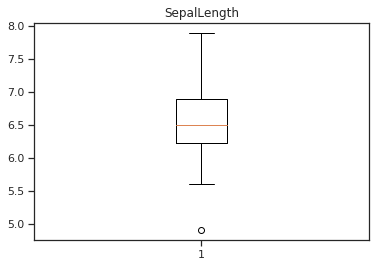

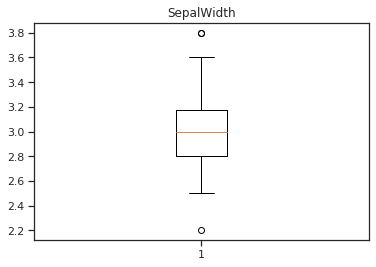

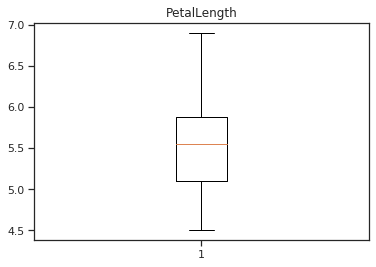

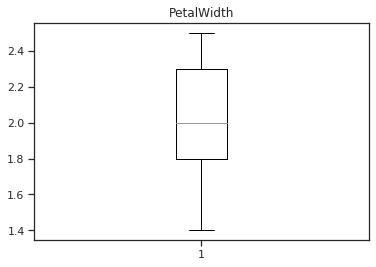

In [7]:
for name in column_names:
    plt.boxplot(iris[name])
    plt.title(name)
    plt.show()

In [8]:
for name in column_names:
    name_sample = iris[name].to_numpy()
    median = np.median(name_sample)
    iqr = stats.iqr(name_sample)
    more_upper_bound = np.where(name_sample > median + 1.5 * iqr)
    less_lower_bound = np.where(name_sample < median - 1.5 * iqr)
    print(f'Amount of outbursts for {name}: {len(*more_upper_bound) + len(*less_lower_bound)}')
   

Amount of outbursts for SepalLength: 7
Amount of outbursts for SepalWidth: 4
Amount of outbursts for PetalLength: 1
Amount of outbursts for PetalWidth: 0


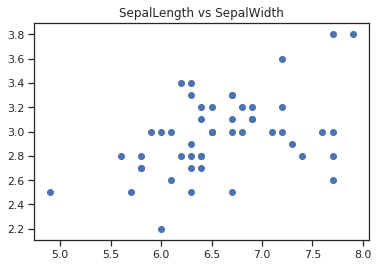

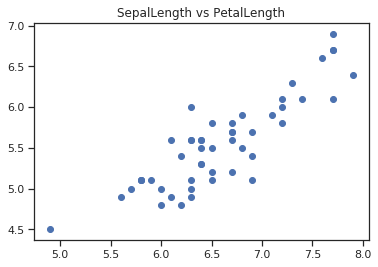

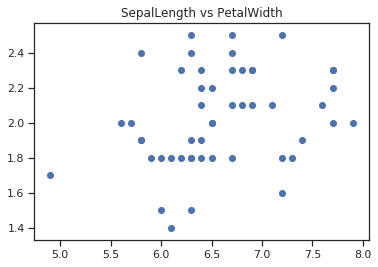

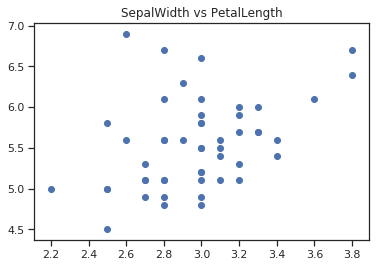

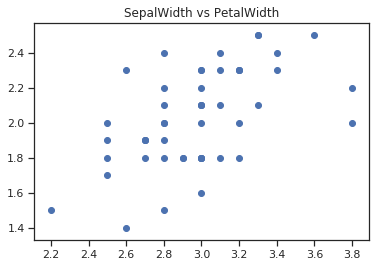

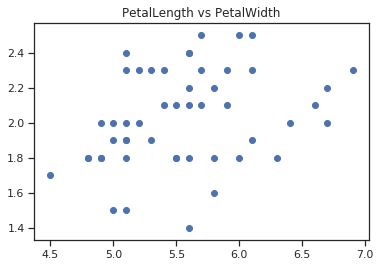

In [9]:
for one, another in itertools.combinations(column_names, 2):
    plt.scatter(iris[one], iris[another])
    plt.title(f'{one} vs {another}')
    plt.show()

In [10]:
for one, another in itertools.combinations(column_names, 2):
    corr, p = stats.pearsonr(iris[one], iris[another])
    print(f'Correlation coefficient for {one} and {another} %.3f with p-value %.5f' % (corr, p))
    

Correlation coefficient for SepalLength and SepalWidth 0.457 with p-value 0.00084
Correlation coefficient for SepalLength and PetalLength 0.864 with p-value 0.00000
Correlation coefficient for SepalLength and PetalWidth 0.281 with p-value 0.04798
Correlation coefficient for SepalWidth and PetalLength 0.401 with p-value 0.00390
Correlation coefficient for SepalWidth and PetalWidth 0.538 with p-value 0.00006
Correlation coefficient for PetalLength and PetalWidth 0.322 with p-value 0.02254


In [11]:
iris_normal_columns = iris[names_normal].to_numpy()
is_normal, p = pg.multivariate_normality(iris_normal_columns)
print(f'p-value for multivariate_distribution %.3f' % p)
print(f'Sample mean: {np.mean(iris_normal_columns, axis=0)}')
print(f'Covariation matrix\n{np.cov(iris_normal_columns.T)}')

p-value for multivariate_distribution 0.497
Sample mean: [6.588 2.974 5.552 2.026]
Covariation matrix
[[0.40434286 0.09376327 0.3032898  0.04909388]
 [0.09376327 0.10400408 0.07137959 0.04762857]
 [0.3032898  0.07137959 0.30458776 0.04882449]
 [0.04909388 0.04762857 0.04882449 0.07543265]]
